# Calcul Numeric - Laborator 3 - Data Visualization

## Data science este OSEMN

Conform unui model popular, elementele data science-ului modern sunt:

- **Obținerea datelor**. Datele pot fi obținute în mai multe moduri, fie direct prin citirea și preprocesarea datelor din surse diferite, fie prin simulare, fie prin colectarea propriului set de date sau prin alte metode.
- **Sistemarea datelor**. Se referă la pre-procesarea și pregătirea datelor pentru analiză, identificând și rezolvând erori, inconsistențe și inexactități. Scopul este de a îmbunătăți calitatea setului de date și de a asigura că este potrivit pentru analiza sau sarcina de învățare automată planificată.
- **Explorarea/vizualizarea datelor**. În timpul etapei de explorare, lumea analizează și explorează datele pentru a obține insights, identifica modele și înțelege relațiile dintre variabile. Tehnici de vizualizare sau statistice sunt adesea utilizate în această etapă.
- **Modelarea datelor**. Implică construirea modelelor de învățare automată sau modelelor statistice pentru a face predicții, clasifica datele sau pentru a avea o înțelegere mai profundă a modelelor identificate în etapa de explorare.
- **Interpretarea datelor**. Interpretarea rezultatelor analizei este ultimul pas. Aici, se atribuie o semnificație la ceea ce a fost obținut și se pun o mulțime de întrebări. De ce arată așa rezultatele? Trebuia să ne așteptăm la asta? Ce putem concluziona?


Și de aici acronimul OSEMN, pronunțat „Awesome”.


### Obiectivul laboratorului

În acest laborator ne vom concentra asupra modului în care se obțin, preprocesează și vizualizează datele - în principal, pe primele trei etape.

## Obținerea datelor - citirea/scrierea fișierelor

Accesul la date este un aspect critic. Datele pot exista fie în domenii publice, fie pe servere remote. Tratarea datelor publice este adesea simplă, dar când vine vorba de date externe, există anumite chestiuni de luat în considerare.

Indiferent de locația datelor, gestionarea seturilor de date poate deveni complexă, în special cu seturi de date mai mari. Deși nu vom intra în detaliile gestionării a astfel de date, este bine de știut. Stocarea datelor direct într-un repository de Git nu este recomandată.

Acum veți crea simplu un director dedicat și veți copia acolo seturile de date. Acest lucru poate fi realizat într-un terminal urmând următorii pași:

- creați un director de date în directorul curent

``mkdir ./data/``

- verificați conținutul (care acum este gol, desigur)

``ls -ltr ./data/`` sau ``dir ./data/``

- în cazul în care doriți să vă deplasați acolo:

``cd ./data/``

### Descărcarea datelor 
Acest server găzduiește o colecție de seturi de date intrigante - https://archive.ics.uci.edu/datasets, create special pentru ML. În secțiunile următoare, vom utiliza setul de date Iris, unul dintre cele mai vechi seturi de date.

In [11]:
# deci descărcăm setul de data
!wget https://archive.ics.uci.edu/static/public/53/iris.zip -P ./data/
# facem unzip
!tar -xf ./data/iris.zip -C ./data/
# dacă nu merge comanda, încearcă să îl dezarhivezi manual

--2025-03-10 14:12:56--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... failed: No such host is known. .
wget: unable to resolve host address 'archive.ics.uci.edu'


### Formate 
Seturile de date prezintă o multitudine de formate de stocare, adesea adaptate la aplicații specifice, deși eforturile de a stabili standarde sunt în creștere. Python are instrumente pentru o gamă largă de formate - vom folosi azi câteva dintre acestea.

### Fișiere text
Fișierele de text simplu sunt folosite în mod obișnuit pentru că sunt "citibile", la prețul unei eficiențe de stocare foarte reduse datorită densității scăzute de informație. UTF-8 este cea mai comună codare.

Citirea (și scrierea) fișierelor text în Python este simplă:

In [12]:
# in python
with open('./data/iris.names', 'r') as file:   # deschidem fișierul în read mode ('r')
    file_content = file.read() # citim conținutul?

print(file_content)


# windows - in notepad
# !notepad ./data/iris.names

# linux - cu cat, stiti voi
# !cat ./data/iris.names

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

### Fișiere în format CSV 

Ele sunt deja pre-structurate într-un mod tabular. Aceste fișiere sunt cunoscute în mod obișnuit sub denumirea de „comma separated values” (valori separate prin virgulă) (CSV), dar nu folosesc neapărat simbolul "," ca separator. Python oferă un pachet pentru a gestiona astfel de fișiere:

In [13]:
import csv

with open('./data/iris.data') as data_file:
    for line in csv.reader(data_file, delimiter=','):  # delimitatorul este adesea ghicit de cititor
        # observați că elementele fiecărei linii sunt tratate ca stringuri
        # dacă doriți să le convertiți în numere, trebuie să faceți asta manual
        sepalLength, sepalWidth, \
        petalLength, petalWidth = map(float, line[:-1])  # aici folosim map cu funcția float pentru a converti fiecare string
        category = line[-1]
        print(sepalLength, sepalWidth, petalLength, petalWidth)
        break  # afișăm doar prima linie - adică oprim cu break for-ul de mai sus


5.1 3.5 1.4 0.2



Uneori, fișierele CSV conțin comentarii (de exemplu, începând cu '#'), care nu pot fi interpretate de cititor. Ar fi utile trucuri precum:

```csv.reader(row for row in f if not row.startswith('#'))```


### Fișierele JSON
JSON reprezintă JavaScript Object Notation - un format folosit pe scară largă pentru partajarea resurselor web. Este foarte similar în structură cu un dicționar Python. Iată un exemplu:

In [14]:
%%file example.json
{
  "employees": [
    {
      "id": 1,
      "name": "John Doe",
      "position": "Software Engineer",
      "department": "Engineering",
      "salary": 80000
    },
    {
      "id": 2,
      "name": "Jane Smith",
      "position": "Data Scientist",
      "department": "Data Science",
      "salary": 90000
    }
  ]
}

Overwriting example.json


In [15]:
import json
data = json.load(open('example.json'))
print(data)

{'employees': [{'id': 1, 'name': 'John Doe', 'position': 'Software Engineer', 'department': 'Engineering', 'salary': 80000}, {'id': 2, 'name': 'Jane Smith', 'position': 'Data Scientist', 'department': 'Data Science', 'salary': 90000}]}


In [16]:
# poate fi manipulat în continuare ca și un dicționar obișnuit
data['employees'][0]

{'id': 1,
 'name': 'John Doe',
 'position': 'Software Engineer',
 'department': 'Engineering',
 'salary': 80000}

### Pandas
Pandas se evidențiază ca instrumentul cel mai convenabil pentru citirea și prelucrarea seturilor de date formatate. Modulul `numpy` este excelent pentru calcul numeric, dar pentru a gestiona datele lipsă sau matricele cu tipuri mixte este necesară o muncă mai susținută. Modulul `pandas` este în prezent cel mai folosit instrument pentru manipularea datelor, furnizând structuri de date cu performanțe ridicate, ușor de utilizat și instrumente avansate de analiză a datelor.

In [17]:
import pandas as pd
file_name = "./data/iris.data"
data = pd.read_csv(file_name, nrows=1000)
data.columns = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'category']
data

,sepalLength,sepalWidth,petalLength,petalWidth,category
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


array([[<Axes: title={'center': 'petalLength'}>]], dtype=object)

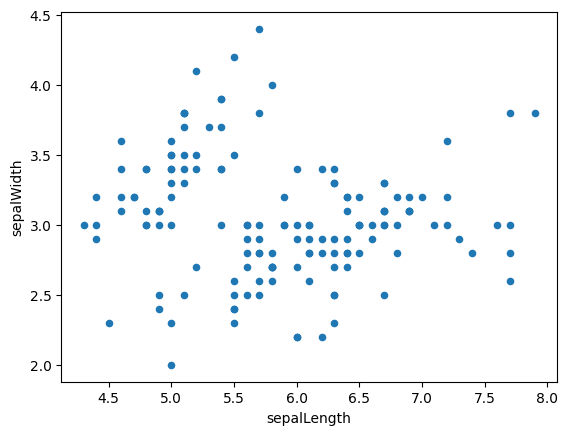

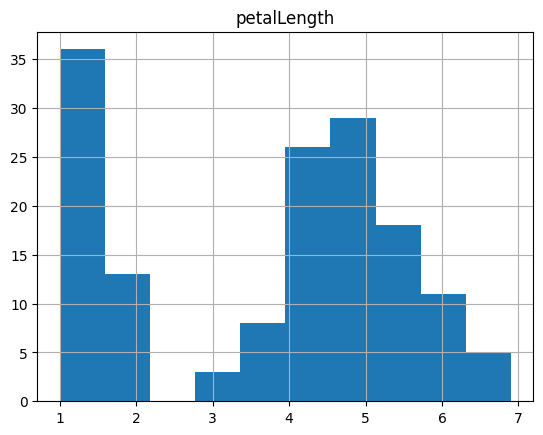

In [18]:
%matplotlib inline
data.plot.scatter("sepalLength","sepalWidth",)  
data.hist("petalLength")

### Salvarea datelor - scriere în fișiere

Există multiple posibilități pentru a-ți salva datele. Aici, vom explora trei posibilități.

In [ ]:
data_to_be_saved = data[['petalLength', 'petalWidth']] # deci vrem să salvăm mărimile petalelor
data_to_be_saved['petalWidth'][100]

In [ ]:
# METODA 1 - cu write
text_file = open("data.txt", "w")
for col in data_to_be_saved:
    for idx in range(len(data_to_be_saved['petalLength'])):
        text_file.write(str(data_to_be_saved['petalLength'][idx]) + ', ' + str(data_to_be_saved['petalWidth'][idx]))
        # new line
        text_file.write('\n')
text_file.close()

# METODA 2 - cu numpy
import numpy as np
np.savetxt('data_np.txt', data_to_be_saved)

# METODA 3 - cu pandas
data_to_be_saved.to_csv('data_pd.txt', header=False, index=False)

Verifică dacă cele trei fișiere s-au creat și aruncă o privire asupra lor.

### Exercițiu

- Creați o listă aleatoare de numere și salvați-o într-un fișier text numit "simple_data.txt".
- Creați o matrice aleatoare de dimensiune 5x5 și salvați-o într-un fișier text numit "data.txt".
- Încărcați fișierul text salvat în punctul 2 și convertiți-l într-un fișier CSV (manual - fără a utiliza numpy, librarie csv sau pandas).


## Data Visualization
Graficele ar trebui să transmită cât mai multă informație posibil într-un mod intuitiv. Există multe reprezentări posibile.
În acest laborator vom discuta despre histograme și scatter plots.

### Scatter plots
Diagramele de tip „scatter” sunt folosite pentru a compara două cantități, având ca principal obiectiv afișarea posibilelor corelații dintre ele.

Este posibilă și afișarea mai multor seturi de valori pe același grafic, marcând punctele de date diferit, de exemplu, cu culori sau semne diferite.

În cadrul acestui laborator vom folosi pachetul `matplotlib`. Dacă nu îl aveți instalat, folosiți `pip` - vezi laboratorul precedent.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Mai jos afișăm un exemplu simplu de reprezentare grafică. Pentu asta generăm două liste, una pentru axa Ox și alta pentru axa Oy. Folosim metoda `scatter` pentru a afișa punctele.

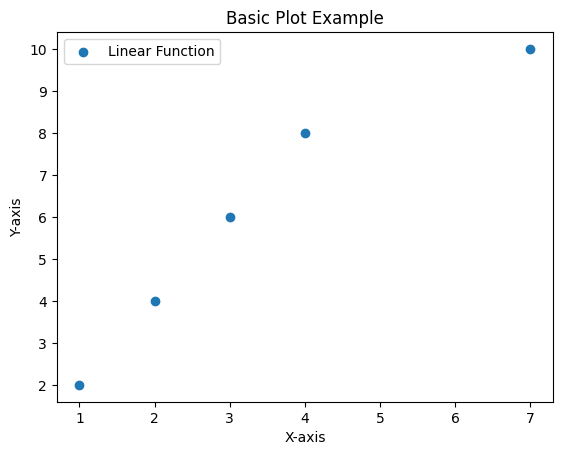

In [5]:
x = [1, 2, 3, 4, 7]
y = [2, 4, 6, 8, 10]

fig, ax = plt.subplots()

ax.scatter(x, y, label='Linear Function') 
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Basic Plot Example')
ax.legend()

plt.show()

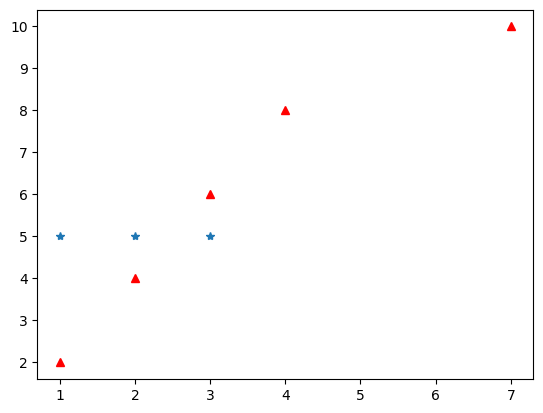

In [9]:
plt.plot(x,y, '^', color='red')
plt.plot([1,2,3], [5, 5, 5], '*')

### Exercițiu

- Schimbați din metoda `scatter` în metoda `plot`. Ce observați?
- Adăugați argumentul `color` în metoda de plotare și schimbați culoarea, e.g. `color='orange'`.
- Adăugați încă un punct pe grafic.

#### Reprezentarea unei funcții. Subploturi.
Mai jos aveți un exemplu despre cum să reprezentați funcția `sin` și `cos` pe două subploturi diferite ale aceleiași figuri. Vom folosi `linspace` pentru a genera valori de input pentru funcțiile pe care vrem să le trasăm pe grafic.

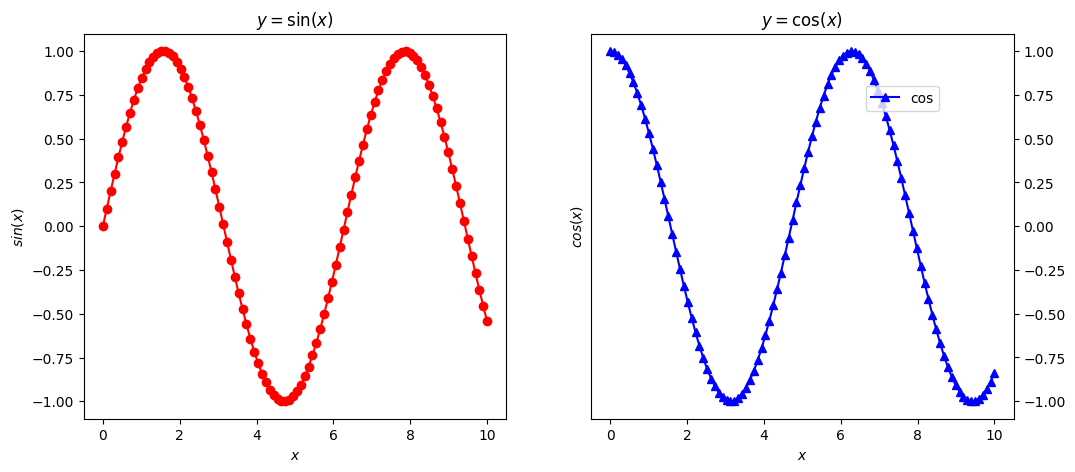

In [11]:
x = np.linspace(0, 10, 100)  # generam x-uri pt a calcula valorile functiilor sin si cos mai jos
y_1 = np.sin(x)
y_2 = np.cos(x)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1.plot(x, y_1, marker='o', color='red')
ax1.set_title(r'$y=\sin(x)$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$sin(x)$')


ax2.plot(x, y_2, '^-b', label='cos')  # argumentul cheie label va fi folosit in legenda 
ax2.set_title(r'$y=\cos(x)$')
ax2.set_xlabel(r'$x$')
ax2.set_ylabel(r'$cos(x)$')
ax2.legend(loc=(0.65, 0.8)) # cu loc stabilim unde punem legenda, incearca s-o muti unde doresti
ax2.yaxis.tick_right() # mutam tick urile pe dreapta

plt.show()


Câteva comentarii:

- Odată ce se creează o Figură "1x2", rezultatul returnat de `plt.subplots(1, 2)` este acum un obiect Figure și un tablou NumPy de obiecte Axes. Alternativ:
```
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
# ax este acum un tablou NumPy de axe
```
Lucrăm cu ax1 și ax2 individual, deci dacă facem ceva cu ax2, nimic nu se va întâmpla cu ax1 (vedeți mai sus cum am folosit tick_right doar pentru ax2)

Textul dintre semnele de dolar utilizează marcare TeX (puteți încerca lucruri mai sofisticate LaTeX).

### Exercițiu

- Utilizați datele setului Iris și plotați lungimea sepalei în funcție de lungimea petalei.
- Personalizați graficul cu diferite culori, marcaje și o legendă. Luați în considerare și documentația pentru mai multe opțiuni de personalizare: [Opțiuni de personalizare Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)
- Pe aceeași axă, plotați și lățimea petalei în funcție de lungimea petalei. Alegeți o culoare și un marcaj diferit și adăugați etichete sugestive pentru legendă pentru a le distinge între ele.


### Histograme

Histograma reprezintă o funcție scalară, $f(x): {\rm I\!R}^n \to {\rm I\!R}$, unde cel mult $n=2$. Sunt folosite în general pentru a evidenția caracteristicile distribuției datelor. Histograma este adesea utilizată pentru comparații între mai multe distribuții.

#### O scurtă introducere matematică pentru cei curioși

Histograma este "îmbinată", adică domeniul este împărțit în clase (binuri), adică pentru binul $i$-th avem $x_i<x\le x_{i+1}$ și conținutul binului (să zicem $h(x)$) este $h(x)=\frac{\int_{x_{i}}^{x_{i+1}} f(x)}{x_{i+1}- x_{i}}$. Binurile nu trebuie să aibă neapărat aceeași dimensiune, adică ar putea fi cazul ca $(x_{i+1}- x_{i}) \neq (x_{j+1}- x_{j})$ pentru $i\neq j$. 
Dacă dimensiunea binului este mică, $h(x)\simeq f(\frac{x_{i+1}+x_{i}}{2})$.

Alegerea numărului de binuri și a dimensiunii lor necesită multă atenție. În mod tipic, conținutul fiecărui bin $i$, $N_i$, ar trebui să fie statistic semnificativ, adică incertitudinea Poisson, $1/\sqrt{N_i}$, ar trebui să fie mică.

Adesea, o astfel de incertitudine merită să fie indicată, în special dacă distribuția este normalizată sau dacă conținutul binului provine dintr-o simulare (și, prin urmare, trebuie ponderat).

#### Formă și Normalizare

Există în esență două cantități care sunt transmise de o histogramă:
   * Cantitatea totală de date, adică normalizarea acestora
   * Forma sau distribuția diferențială, adică distribuția de probabilitate

Ambele cantități pot fi exprimate separat, citând $N=\sum f(x_i)$ numărul de intrări și afișând
$f(x)/N$. De fapt, definiția factorului de normalizare ar putea fi ambiguă; ar putea fi fie $N$, fie 
$I=\int f(x) dx$. Prima este cea mai frecvent utilizată (și cea mai utilă), dar cea din urmă este adesea implicită în metodele incorporate ale mai multor pachete de vizualizare.


#### Exemplu pe setul de date Iris

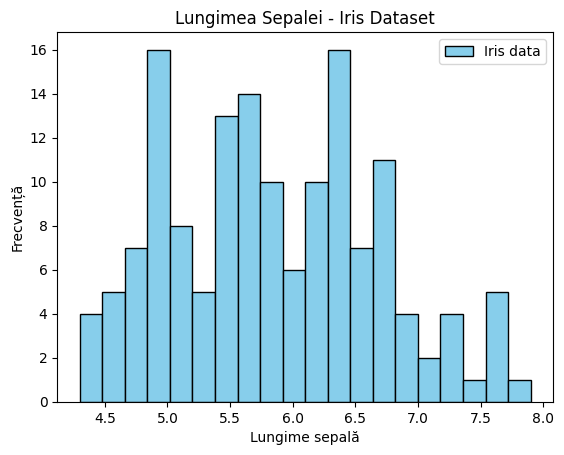

In [19]:
# extragem coloana 'sepalLength'
sepal_length = data['sepalLength']

# generam histrograma
plt.hist(sepal_length, bins=20, color='skyblue', edgecolor='black', label='Iris data')

plt.xlabel('Lungime sepală')
plt.ylabel('Frecvență')
plt.title('Lungimea Sepalei - Iris Dataset')

plt.legend()
plt.show()

Observă că în cazul histogramei, am folosit direct `plt.hist` în loc să folosim un Axes `ax` și `ax.hist`. Această metodă este convenabilă pentru plotări rapide, dar poate fi mai puțin flexibilă atunci când dorești să ai mai mult control asupra figurii și a mai multor subploturi. De asemenea, poți folosi `plt.plot` și acesta va crea automat Axes pentru tine.


### Exercițiu

- Creează aceeași histogramă folosind datele Iris, dar definește-ți propriul ax și plotează-o folosind `ax.hist`. Folosește $\sqrt{N}$ binuri, unde $N$ este numărul de mostre utilizate în crearea histogramei.
- Realizează un grafic cu `plt.plot` folosind oricare dintre datele Iris. Folosește o linie întreruptă (dashed line --).


## Grafice de contur și suprafață

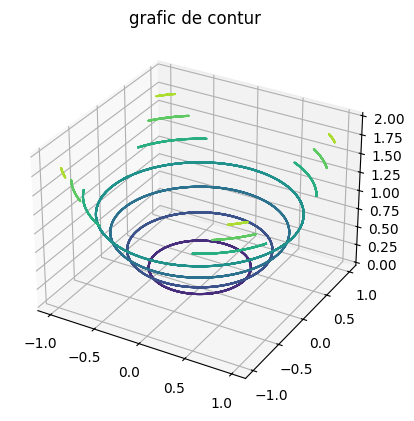

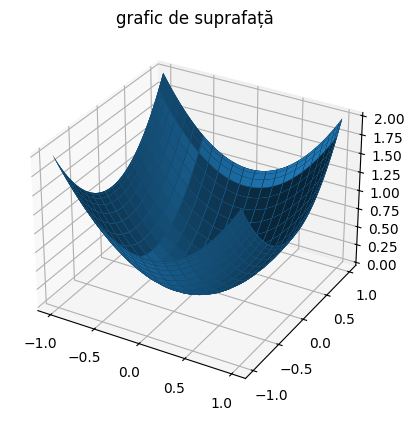

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
  
a = np.cos(np.linspace(0, 2 * np.pi, 1000))
b = np.sin(np.linspace(0, 2 * np.pi, 1000))
a, b = np.meshgrid(a, b) 
  
fig = plt.figure() 
axes = fig.add_subplot(projection = '3d')
axes.contour(a, b, a**2 + b**2) 
plt.title('grafic de contur')
plt.show() 

fig = plt.figure() 
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(a, b, a**2 + b**2) 
plt.title('grafic de suprafață')
plt.show() 

#### Ce diferențe observati?

## Plotarea imaginilor

De obicei, imaginile se plotează cu metoda `imshow` din pachetul matplotlib (vezi [documentația](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html#)). Cu ajutorul imaginilor putem vizualiza distribuții într-un spațiu bidimensional. Vom explora în continuare crearea imaginilor ce folosesc un colormap (o hartă de culori). Datele se vor introduce ca input pentru metoda `imshow` sub forma unei matrice 2D, iar harta de culoare va atribui fiecărui element din imagine (pixel) o anumită culoare corespunzătoare valorii din matrice a acelui element.

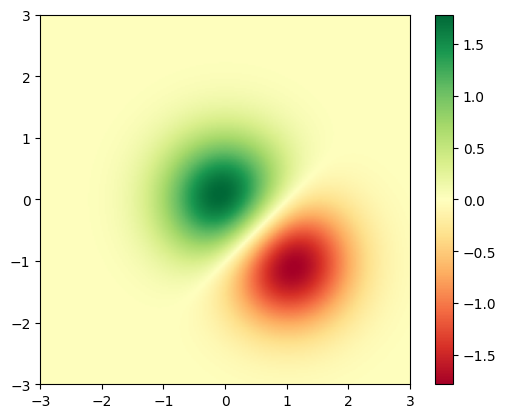

In [37]:
import matplotlib.cm as cm
step = 0.025
x = y = np.arange(-3.0, 3.0, step)    
X, Y = np.meshgrid(x, y)  # definim un grid cu valori cuprinse între -3 și 3 conform output-ul funcției arange

def f(X, Y):
    return (np.exp(-X**2 - Y**2) - np.exp(-(X - 1)**2 - (Y - 1)**2)) * 2   
    

# generăm valorile care vor fi vizualizate - folosim funcția f pe care o putem schimba după bunul plac
Z = f(X, Y)
# dacă X și Y sunt independente, atunci f se mai numește și funcție bivariată

fig, ax = plt.subplots()
im = ax.imshow(Z, cmap=cm.RdYlGn, extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())      # vmin și vmax sunt limitele impuse hărții de culoare
fig.colorbar(im)   # creăm un colorbar (o bară de culori) pentru a vedea valorile corespunzătoare culorilor
plt.show()

### Exercițiu
- Modificați argumentele cheie `vmax` și `vmin` ale metodei `imshow` și vedeți ce se întâmplă. 
- Alegeți o altă funcție bivariată și folosiți această funcție pentru a face un nou plot.
- Inserați un text pe imagine folosind `ax.text()`. Verificați https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html pentru mai multe detalii.

### Cum funcționează meshgrid?
Observați că am folosit `meshgrid` pentru `x` și `y`. Aceasă funcție returnează două matrice 2D prin care obținem toate perechile posibile `(x,y)`. Astfel, obținem un grid discret și reprezentativ pentru spațiul bidimensional pe care vrem să îl reproducem. Fiecare valoare din grid (`Z`) va fi calculată aplicând funcția `f` perechilor generate anterior. Același lucru îl puteți obține și prin broadcasting.

In [ ]:
# un alt exemplu cu meshgrid
x = np.arange(0, 1000, 100)
y = np.arange(0, 5, 1)
X, Y = np.meshgrid(x, y)
print(f"x={x}")
print(f"y={y}")
print(f"meshgrid output = {X, Y}")

# inițializăm grid-ul
print(f'grid shape = {X.shape}')  # X și Y au același shape
grid = np.empty(X.shape, dtype="<U10")  # <U10 ---> string Unicode de lungime 10; little endian format


# fiecare element din grid (un „pixel” din imagine) corespunde unei perechi (x, y)
for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        grid[i][j] = f"x={x[j]}, y={y[i]}"
        
print(grid)  


# să calculăm de exemplu suma x + y pentru fiecare pereche (x, y) din grid
print(X + Y) 

# în același mod am folosit meshgrid și în exemplul cu funcția bivariată f

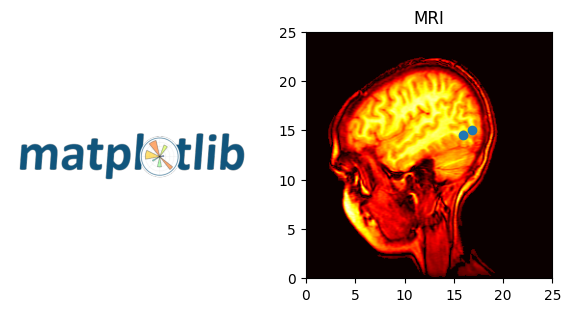

In [38]:
# o imagine de probă
import matplotlib.cbook as cbook
image_path = cbook.get_sample_data('logo2.png', asfileobj=False)  
# matplotlib are câteva date de probă, iar get_sample_data ne dă calea către aceste date
# puteți modifica path-ul pentru o altă imagine de pe mașina voastră (de exemplu - C:\Users\georg\OneDrive\Imagini\vadim.png)

image_file = open(image_path, 'rb')  
# r - pentru fișiere text, rb - pentru fișiere binare, trebuie adăugat b de la binar
image = plt.imread(image_file)

# imagini 256x256 pe 16 biți
w, h = 256, 256
with cbook.get_sample_data('s1045.ima.gz') as datafile:
    s = datafile.read()
A = np.frombuffer(s, np.uint16).astype(float).reshape((w, h))
extent = (0, 25, 0, 25)


fig, ax = plt.subplot_mosaic([
    ['logo', 'mri']
], figsize=(7, 3.5))

# logo 
ax['logo'].imshow(image)
ax['logo'].axis('off')  # deci nu afișăm axele (Ox și Oy) pentru imaginea de probă logo

# MRI 256x256 
im = ax['mri'].imshow(A, cmap=plt.cm.hot, origin='upper', extent=extent)
markers = [(15.9, 14.5), (16.8, 15)]
x, y = zip(*markers)
ax['mri'].plot(x, y, 'o')   # mai plotăm doi markeri să vedem cum se face
ax['mri'].set_title('MRI') 

plt.show()

### Exercțiu
- Generați un tablou cu 625 elemente folosind `linspace`
- Aplicați un reshape pentru a obține o matrice pătratică și plotați aceasta folosind `imshow`.
- Adăugați un colormap. Explorați diferite hărți de culoare: https://matplotlib.org/stable/gallery/color/colormap_reference.html

### Imagini de tip „Heatmap”

Începem prin a defini datele. Avem nevoie de un tablou/o listă 2D care să conțină datele sub forma unui grid. Alte două liste sunt necesare pentru a eticheta fiecare element din tabloul 2D pe cele două axe. Fiecare element din grid va avea o perche distinctă de etichete. Un „heatmap” va fi în final un plot `imshow` cu etichete customizate (de obicei, string-uri în loc de valori numerice). Etichetele sunt setate folosind (`set_xticks`) pentru locații și (`set_xticklabels`) pentru nume. Locația etichetelor se definește printr-un număr întreg.

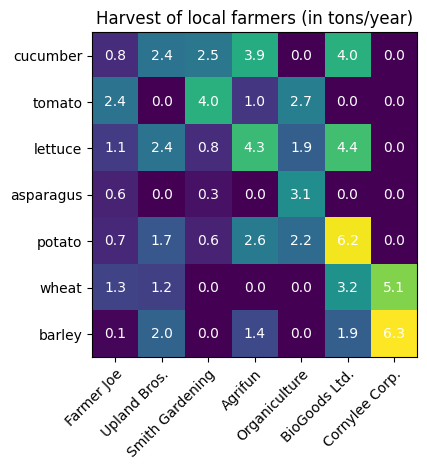

In [39]:
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# afișăm toate etichetele și le atribuim numele folosind listele de mai sus
ax.set_xticks(np.arange(len(farmers)), labels=farmers) 
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# rotim etichetele de pe Ox cu 45 de grade în dreapta 
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# iterăm pentru a scrie cu text valorile numerice ale fiecărui element
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

Exemplul a fost preluat din documentația matplotlib: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html

Puteți găsi pe link-ul de mai sus și alte exemple de heatmap-uri, chiar și mai avansate.